# Exemplo de reamostragem das partículas

In [1]:
from random import randint, choice
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math
import random
from pf import Particle, draw_random_sample


import cv2

import sys
import os
os.getcwd() 
import sys
sys.path.append(os.getcwd())


import inspercles3 as inspercles

import importlib



importlib.reload(inspercles)


# Para suprimir alguns warnings do Matplotlib Inline
import warnings
warnings.simplefilter('ignore')
%matplotlib inline



## Diretõrio de trabalho

In [2]:
!pwd




/Users/mirwox/Dropbox/Insper/2016/Robotics/src/robotica_pf2018/old


In [3]:


from PIL import Image as PilImage


color_image = cv2.imread("sparse_obstacles.png")
pil_image = color_image
np_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)


#color_image = PilImage.open("sparse_obstacles.png", 'r')
#pil_image = color_image.convert('1') # Converte a imagem PIL para Grayscale
#np_image = np.asarray(pil_image)

particle_size = 10

#import matplotlib_render as plotmap


back_color = "black"
colors     = ['red', 'green', 'cyan', 'yellow']
width, height = 775, 746

inspercles.width = width
inspercles.height = height




initial_pose = [200, 200, math.pi/8] # Posicao inicial considerada para o pf
inspercles.initial_pose = initial_pose
pose = [330, 220, math.radians(90)] # posicao "verdadeira" do robo 
inspercles.pose = pose
robot_radius=10   # Raio do robo
inspercles.robot_radius = robot_radius


# Os angulos em que o robo simulado vai ter sensores
angles = np.linspace(0.0, 2*math.pi, num=8)

particle_cloud = []



    
    
    
    

## Mapa com posição inicial

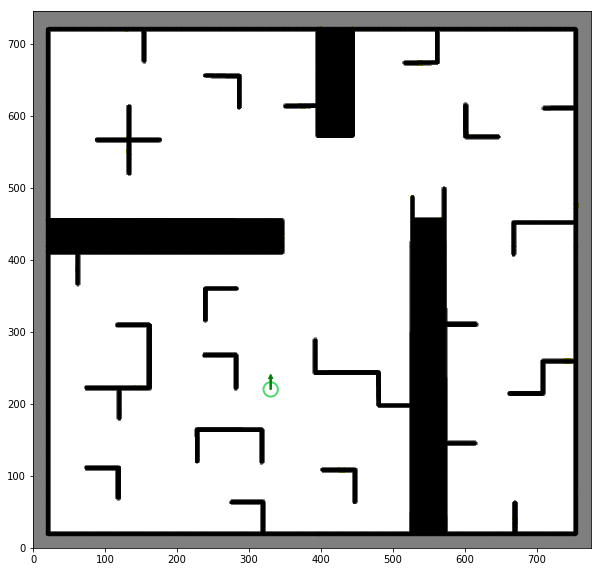

In [4]:
inspercles.nb_draw_map(color_image, pose=pose, robot=True)

A função *nb_initialize_particle_cloud()* pertence ao módulo <code>inspercles</code> e já faz uma primeira aleatorização das partículas

In [5]:
particulas = inspercles.nb_create_particles(pose = initial_pose, var_x = 100, var_y = 100, var_theta = math.pi/2, num = 10)


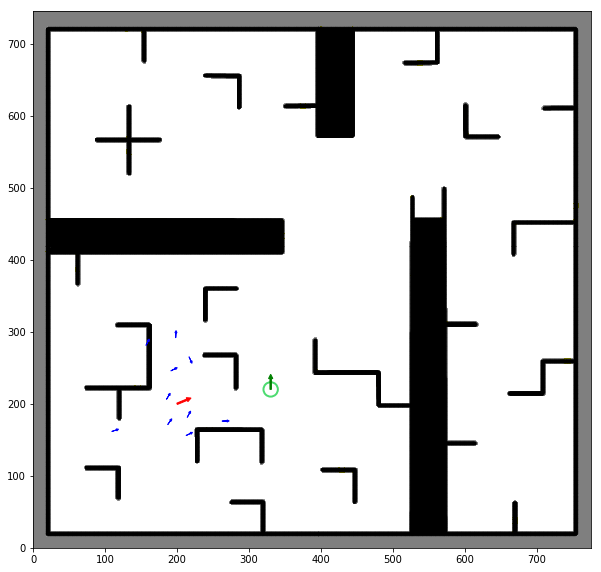

In [6]:
inspercles.nb_draw_map(color_image, particles = particulas, initial_position = initial_pose, pose=pose, robot=True)

Vamos tornar a distribuição das partículas desequilibrada para observarmos a reamostragem

In [7]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [8]:
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]
particulas_pesos = [p.w for p in particulas]

In [9]:
particulas_exp

[[109.28772809126986, 161.55008449570778, 0.32246123047311337],
 [212.51587957723484, 155.96357163662623, 0.4466624546435525],
 [186.96716588479, 171.05808544431838, 0.9618189350861264],
 [198.12183713771205, 291.7460168156945, 1.525432854312267],
 [156.80088909307634, 281.0914868220825, 1.093615070980316],
 [214.08959107748183, 181.09082405438994, 1.0818649583727358],
 [216.60436998296075, 265.3524030758608, -1.1460463861636905],
 [185.22622979357243, 206.1479005020678, 1.0205758544792225],
 [191.31946840805807, 245.76311760487638, 0.45979290212843127],
 [262.4299762423328, 176.0372041389806, 0.015260459086094524]]

Vejam como está a distribuição dos pesos

In [10]:
particulas_pesos

[0.8,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223]

Vamos criar novas partículas reamostrando

In [11]:
novas_particulas = draw_random_sample(particulas, particulas_pesos, 10)

A probabilidade que está em peso perdeu o sentido. Precisamos fazer com que todos os pesos virem w=1

In [12]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

Vamos ver as partículas

Vamos observar os valores das partículas

In [13]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula que na geração anterior tinha $80\%$ de probabilidade é muito mais comum agora


<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>

In [15]:
valores_novas_particulas

[[109.28772809126986, 161.55008449570778, 0.32246123047311337],
 [109.28772809126986, 161.55008449570778, 0.32246123047311337],
 [109.28772809126986, 161.55008449570778, 0.32246123047311337],
 [109.28772809126986, 161.55008449570778, 0.32246123047311337],
 [212.51587957723484, 155.96357163662623, 0.4466624546435525],
 [109.28772809126986, 161.55008449570778, 0.32246123047311337],
 [109.28772809126986, 161.55008449570778, 0.32246123047311337],
 [156.80088909307634, 281.0914868220825, 1.093615070980316],
 [109.28772809126986, 161.55008449570778, 0.32246123047311337],
 [109.28772809126986, 161.55008449570778, 0.32246123047311337]]

![](animated.gif)